## Exercise 1

Given $X_1, \dots, X_n \sim N(\theta, \sigma^2)$, we have
$$\mathcal{L}(\theta) = \prod_{i=1}^n f(X_i;\theta) = (2\pi)^{-n/2} \sigma^{-n} \exp\left\{ -\frac{1}{2\sigma^2} \sum_{i=1}^n (X_i - \theta)^2 \right\}.$$
The prior is
$$\pi(\theta) = \frac{1}{\sqrt{2\pi} b} \exp\left\{-\frac{(\theta - a)^2}{2b^2}\right\}.$$

By the Bayes theorem, the posterior is then
$$\begin{split}
\pi(\theta|X) 
&\propto \mathcal{L}(\theta) \pi(\theta) \\
&\propto \exp\left\{ -\frac{1}{2\sigma^2} \sum_{i=1}^n (X_i - \theta)^2 -\frac{(\theta - a)^2}{2b^2} \right\} \\
&= \exp\left\{ -\frac{1}{2\sigma^2} \left(\sum_{i=1}^n X_i^2 - 2 \theta \sum_{i=1}^n X_i + n \theta^2 \right) -\frac{1}{2b^2} \left( \theta^2 - 2 a \theta + a^2 \right) \right\} \\
&\propto \exp\left\{ \frac{\theta}{\sigma^2} \sum_{i=1}^n X_i - \frac{n}{2\sigma^2} \theta^2 -\frac{\theta^2}{2b^2} + \frac{a \theta}{b^2} \right\} \\
&= \exp\left\{ - \theta^2 \left( \frac{n}{2\sigma^2} + \frac{1}{2b^2} \right) + \theta \left(\frac{1}{\sigma^2} \sum_{i=1}^n X_i + \frac{a}{b^2} \right) \right\} \\
&= \exp\left\{ - \frac{1}{2} \left( \frac{n}{\sigma^2} + \frac{1}{b^2} \right) \left( \theta^2  - 2 \theta \frac{\frac{1}{\sigma^2} \sum_{i=1}^n X_i + \frac{a}{b^2}}{\frac{n}{\sigma^2} + \frac{1}{b^2}} \right) \right\} \\
&\propto \exp\left\{ - \frac{(\theta - \bar{\theta})^2}{2 \tau^2} \right\}, \\
\end{split}$$
that is
$$\theta|X \sim N(\bar{\theta}, \tau^2),$$
where
$$\begin{split}
\bar{\theta} &= \frac{\frac{1}{\sigma^2} \sum_{i=1}^n X_i + \frac{a}{b^2}}{\frac{n}{\sigma^2} + \frac{1}{b^2}} 
= \frac{\frac{n}{\sigma^2}}{\frac{n}{\sigma^2} + \frac{1}{b^2}} \overline{X} + \frac{\frac{1}{b^2}}{\frac{n}{\sigma^2} + \frac{1}{b^2}} a
= w \overline{X} + (1 - w) a, \\
w &= \frac{\frac{n}{\sigma^2}}{\frac{n}{\sigma^2} + \frac{1}{b^2}} = \frac{\frac{1}{\text{se}^2}}{\frac{1}{\text{se}^2} + \frac{1}{b^2}}, \\
\text{se}^2 &= \frac{\sigma^2}{n}, \\
\frac{1}{\tau^2} &= \frac{1}{\text{se}^2} + \frac{1}{b^2}.
\end{split}$$

## Exercise 2

(a)

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import arviz as az

In [4]:
rng = np.random.default_rng(12345)

In [5]:
mu = 5
n = 100

In [6]:
X = stats.norm.rvs(size=n, loc=mu, scale=1, random_state=rng)

(b) The likelihood is given by
$$\mathcal{L}(\mu) = \prod_{i=1}^n f(X_i;\theta) = (2\pi)^{-n/2} \sigma^{-n} \exp\left\{ -\frac{1}{2} \sum_{i=1}^n (X_i - \mu)^2 \right\}.$$
Using a flat prior
$$\pi(\mu) = 1,$$
the Bayes theorem gives us the posterior
$$\begin{split}
\pi(\mu|X) 
&\propto \mathcal{L}(\mu) \pi(\mu) \\
&\propto \exp\left\{ -\frac{1}{2} \sum_{i=1}^n (X_i - \mu)^2 \right\} \\
&= \exp\left\{ -\frac{1}{2} \left( \sum_{i=1}^n X_i^2 - 2 \mu \sum_{i=1}^n X_i + n \mu^2 \right) \right\} \\
&\propto \exp\left\{ -\frac{n}{2} \left( \mu - \frac{1}{n} \sum_{i=1}^n X_i \right)^2 \right\}, \\
\end{split}$$
so 
$$\mu | X \sim N\left(\overline{X}, \frac{1}{n}\right).$$

In [21]:
mu_posterior = stats.norm(loc=np.mean(X), scale=1 / np.sqrt(n))

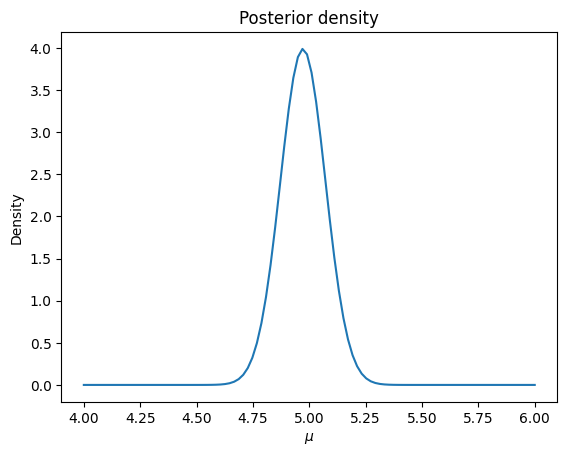

In [22]:
xs = np.linspace(4, 6, 100)

fig, ax = plt.subplots()
ax.plot(xs, mu_posterior.pdf(xs));
ax.set_xlabel('$\\mu$');
ax.set_ylabel('Density');
ax.set_title('Posterior density');

(c)

In [23]:
m = 1000

In [24]:
mu_sample = mu_posterior.rvs(size=m, random_state=rng)

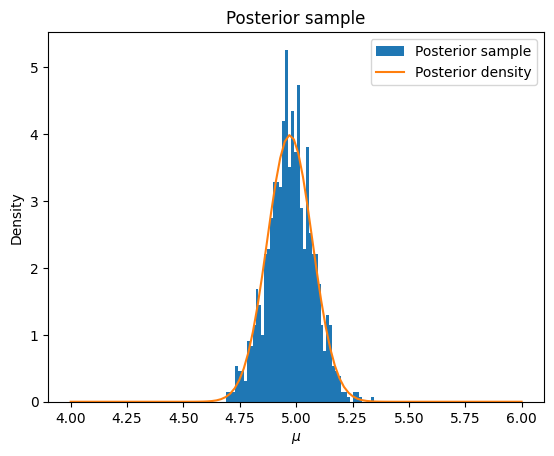

In [26]:
fig, ax = plt.subplots();
ax.hist(mu_sample, bins=50, density=True, label='Posterior sample');
ax.plot(xs, mu_posterior.pdf(xs), label='Posterior density');
ax.legend();
ax.set_xlabel('$\\mu$');
ax.set_ylabel('Density');
ax.set_title('Posterior sample');

The histogram closely matches the density plot.

(d) Using equation (2.12) for $r = e^r$ and $s = \log r$, we have
$$f_\theta(\theta) = \frac{1}{\theta} f_\mu(\log \theta) = \frac{\sqrt{n}}{\sqrt{2\pi}} \exp\left\{-\frac{n}{2} (\log \theta - \overline{X})^2\right\}$$

In [40]:
theta_posterior = stats.lognorm(s=1 / np.sqrt(n), scale=np.exp(np.mean(X)))
theta_sample = np.exp(mu_sample)

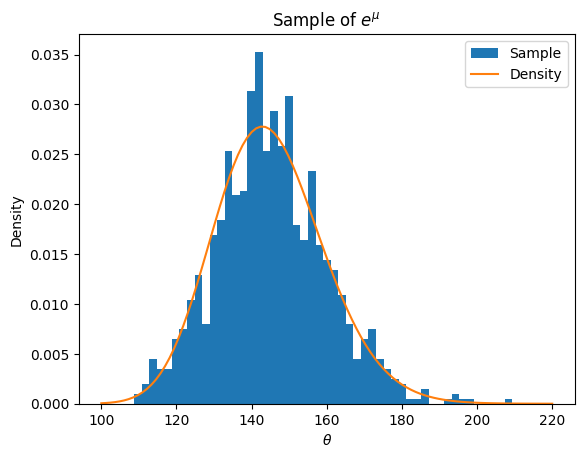

In [41]:
xs = np.linspace(100, 220, 100)

fig, ax = plt.subplots()
ax.hist(theta_sample, bins=50, density=True, label='Sample');
ax.plot(xs, theta_posterior.pdf(xs), label='Density');
ax.legend();
ax.set_xlabel('$\\theta$');
ax.set_ylabel('Density');
ax.set_title('Sample of $e^\\mu$');

(e) Since the posterior for $\mu$ is symmetric, the 95% posterior interval is

In [34]:
alpha = 0.05
mu_posterior.ppf([alpha / 2, 1 - alpha / 2])

array([4.77579582, 5.16778862])

(f) We find a 95% posterior interval for $\theta$ based on the 2.5% and 97.5% quantiles of the theoretical distribution:

In [38]:
theta_posterior.ppf([alpha / 2, 1 - alpha / 2])

array([118.60466484, 175.52625192])

We can also find the interval from the sample:

In [42]:
np.quantile(theta_sample, [alpha / 2, 1 - alpha / 2])

array([117.61251447, 175.2916462 ])

Alternatively, we can find the highest density interval:

In [46]:
az.hdi(theta_sample, 1 - alpha)

array([119.57184076, 176.9508094 ])

All three intervals are very similar.

## Exercise 3

The density of $X_i$ is
$$f(x) = \frac{1}{\theta} \mathbb{1}_{[0, \theta]}(x),$$
so the likelihood is given by
$$\mathcal{L}(\theta) = \prod_{i=1}^n f(x_i) = \frac{1}{\theta^n} \mathbb{1}_{[\max(x_1, \dots, x_n), \infty))}(\theta).$$
Given the prior
$$\pi(\theta) = \frac{1}{\theta},$$
the posterior is
$$\pi(\theta|X) \propto \mathcal{L}(\theta) \pi(\theta) = \frac{1}{\theta^{n+1}} \mathbb{1}_{[\max(x_1, \dots, x_n), \infty))}(\theta).$$

## Exercise 4

We can use the results of Exercise 7 in Chapter 9.

(a) The MLE of $p_1$ and $p_2$ is
$$\begin{split}
\hat{p}_1 &= \frac{X_1}{n_1}, \\
\hat{p}_2 &= \frac{X_2}{n_2}, \\
\end{split}$$
so by Theorem 9.14 (equivariance of MLE),
$$\hat{\tau} = \hat{p}_2 - \hat{p}_1$$
is the MLE of $\tau = p_2 - p_1$.

The squared standard error of $\tau$ is
$$\widehat{\text{se}}(\widehat{\tau})^2 
= \frac{X_1 (n_1 - X_1)}{n_1^3} + \frac{X_2 (n_2 - X_2)}{n_2^3},
$$
so the asymptotic 90% confidence interval is
$$\hat{\tau} \pm z_{0.05} \widehat{\text{se}}$$

In [49]:
n1 = 50
n2 = 50
x1 = 30
x2 = 40

In [56]:
p1_hat = x1 / n1
p2_hat = x2 / n2

In [63]:
tau_hat = p2_hat - p1_hat
tau_hat

0.20000000000000007

In [69]:
se = np.sqrt(p1_hat * (1 - p1_hat) / n1 + p2_hat * (1 - p2_hat) / n2)
se

np.float64(0.08944271909999159)

In [70]:
alpha = 0.1
tau_mle + stats.norm.ppf([alpha / 2, 1 - alpha / 2]) * se

array([0.05287982, 0.34712018])

(b) We generate samples for $x_1^*$ and $x_2^*$ using the parametric bootstrap

In [71]:
m = 1000

In [72]:
x1_star = stats.binom.rvs(size=m, n=n1, p=p1_hat, random_state=rng)
x2_star = stats.binom.rvs(size=m, n=n2, p=p2_hat, random_state=rng)
tau_star = x2_star / n2 - x1_star / n1

The standard error is:

In [74]:
np.std(tau_star)

np.float64(0.08774417359574367)

The pivotal 90% confidence interval is:

In [73]:
2 * tau_hat - np.quantile(tau_star, [1 - alpha / 2, alpha / 2]) 

array([0.059, 0.34 ])

(c) With the likelihood given by
$$\mathcal{L}(X_1, X_2) = {n_1 \choose X_1} p_1^{X_1} (1-p_1)^{n_1 - X_1} {n_2 \choose X_2} p_2^{X_2} (1-p_2)^{n_2 - X_2},$$
and the prior
$$\pi(p_1, p_2) = 1,$$
we get the posterior
$$\pi(p_1, p_2|X) \propto \mathcal{L}(p_1, p_2) \propto p_1^{X_1} (1-p_1)^{n_1 - X_1} p_2^{X_2} (1-p_2)^{n_2 - X_2},$$
which separates into a product of two densities:
$$\begin{split}
p_1|X \sim \text{Beta}(X_1 + 1, n_1 - X_1 + 1), \\
p_2|X \sim \text{Beta}(X_2 + 1, n_2 - X_2 + 1). \\
\end{split}$$

In [76]:
p1_star = stats.beta.rvs(size=m, a=x1 + 1, b=n1 - x1 + 1, random_state=rng)
p2_star = stats.beta.rvs(size=m, a=x2 + 1, b=n2 - x2 + 1, random_state=rng)
tau_star = p2_star - p1_star

The posterior mean:

In [78]:
np.mean(tau_star)

np.float64(0.19011524945855843)

The posterior 90% interval:

In [79]:
np.quantile(tau_star, [alpha / 2, 1 - alpha / 2])

array([0.03971618, 0.3313452 ])

(d) By Theorem 9.14 (equivariance of MLE),
$$\hat{\psi} = \log \left( \left(\frac{\hat{p}_1}{1 - \hat{p}_1}\right) \middle/ \left(\frac{\hat{p}_2}{1 - \hat{p}_2}\right) \right)$$.

Note that
$$\log \left( \left(\frac{p_1}{1 - p_1}\right) \middle/ \left(\frac{p_2}{1 - p_2}\right) \right) = \log p_1 - \log (1 - p_1) - \log p_2 + \log (1 - p_2),$$
so
$$\begin{split}
\frac{\partial \psi}{\partial p_1} &= \frac{1}{p_1} + \frac{1}{1 - p_1}, \\
\frac{\partial \psi}{\partial p_2} &= -\frac{1}{p_2} - \frac{1}{1 - p_2}. \\
\end{split}$$

The inverse of the Fisher information matrix is taken from Exercise 7 in Chapter 9:
$$J = I(p_1, p_2)^{-1} = \begin{pmatrix}
\frac{p_1 (1 - p_1)}{n_1} & 0 \\
0 & \frac{p_2 (1 - p_2)}{n_2} \\
\end{pmatrix}.$$

The standard error of $\hat{\psi}$ can then be obtained by Theorem 9.28 (multiparameter delta method) as
$$\widehat{\text{se}}(\widehat{\psi})^2 = (\widehat{\nabla \psi})^T \widehat{J} (\widehat{\nabla \psi}).$$

In [94]:
def log_odds_ratio(p1, p2):
    return np.log(p1 / (1 - p1) / p2 * (1 - p2))

In [95]:
psi_hat = log_odds_ratio(p1_hat, p2_hat)
psi_hat

np.float64(-0.9808292530117266)

In [83]:
grad = np.array([1 / p1_hat + 1 / (1 - p1_hat), -1 / p2_hat - 1 / (1 - p2_hat)])
J = np.diag([p1_hat * (1 - p1_hat) / n1, p2_hat * (1 - p2_hat) / n2])

In [89]:
se_psi = np.sqrt(grad.T @ J @ grad)
se_psi

np.float64(0.45643546458763845)

The 90% confidence interval for $\psi$ is then

In [90]:
psi_hat + stats.norm.ppf([alpha / 2, 1 - alpha / 2]) * se_psi

array([-1.73159878, -0.23005972])

(e) We can obtain simulated values of $\psi$ from the values $p_1^*$ and $p_2^*$:

In [96]:
psi_star = log_odds_ratio(p1_star, p2_star)

The 90% posterior interval is then

In [97]:
np.quantile(psi_star, [alpha / 2, 1 - alpha / 2])

array([-1.69012701, -0.1892978 ])

## Exercise 5

Using Example 11.1, if the prior for $p$ is $\text{Beta}(a,b)$, the posterior is $\text{Beta}(a + s, b + n - s)$.

In [98]:
s = 2
n = 10

In [99]:
prior_params = [
    (0.5, 0.5),
    (1, 1),
    (10, 10),
    (100, 100),
]

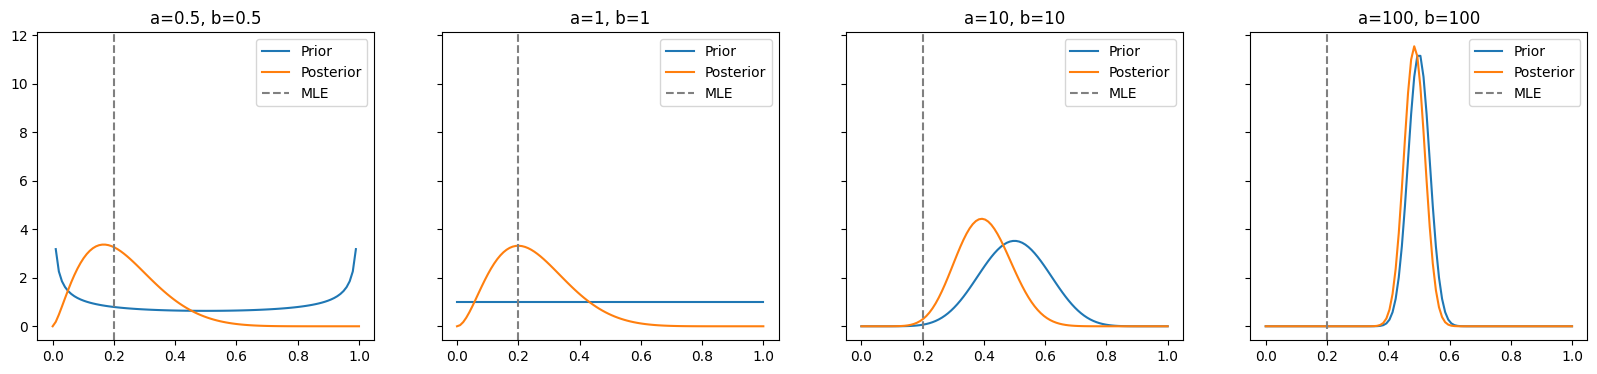

In [106]:
xs = np.linspace(0, 1, 100)

fig, axs = plt.subplots(1, len(prior_params), figsize=(len(prior_params) * 5, 4), sharex=True, sharey=True);
for i, (a, b) in enumerate(prior_params):
    axs[i].plot(xs, stats.beta.pdf(xs, a=a, b=b), label='Prior')
    axs[i].plot(xs, stats.beta.pdf(xs, a=a + s, b=b + n - s), label='Posterior');
    axs[i].axvline(s / n, linestyle='--', color='gray', label='MLE');
    axs[i].legend();
    axs[i].set_title(f'a={a}, b={b}');

## Exercise 6

(a) Since $X_1, \dots, X_n \sim \text{Poisson}(\lambda)$,
we have
$$f(x) = e^{-\lambda} \frac{\lambda^x}{x!}$$
and
$$\mathcal{L}(\lambda) = \prod_{i=1}^n f(X_i) = e^{-n\lambda} \frac{\lambda^{\sum_{i=1}^n X_i}}{\prod_{i=1}^n X_i!}.$$
If the prior is $\text{Gamma}(\alpha, \beta)$:
$$\pi(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha - 1} e^{-\beta \lambda},$$
then the posterior is
$$\pi(\lambda | X) \propto \mathcal{L}(\lambda) \pi(\lambda)
\propto \lambda^{\alpha + \sum_{i=1}^n - 1} e^{-\lambda (\beta + n)},$$
so
$$\lambda | X \sim \text{Gamma}\left(\alpha + \sum_{i=1}^n X_i, \beta + n\right).$$

The posterior mean is
$$\frac{\alpha + \sum_{i=1}^n X_i}{\beta + n}.$$

(b) We have
$$l(\lambda) = \log \mathcal{L}(\lambda) = -n \lambda + \left(\sum_{i=1}^n X_i\right) \log \lambda - \sum_{i=1}^n \log X_i!.$$
Then
$$\begin{split}
l'(\lambda) &= -n + \frac{1}{\lambda} \sum_{i=1}^n X_i, \\
l''(\lambda) &= -\frac{1}{\lambda^2} \sum_{i=1}^n X_i, \\
\end{split}$$
so
$$I_n(\lambda) = -\mathbb{E}[l''(\lambda)] = \mathbb{E}\left[ \frac{1}{\lambda^2} \sum_{i=1}^n X_i \right] = \frac{n}{\lambda}$$
and
$$I(\lambda) = \frac{I_n(\lambda)}{n} = \frac{1}{\lambda}.$$

The Jefferys prior is then
$$\pi(\lambda) = I(\lambda)^{1/2} = \frac{1}{\sqrt{\lambda}},$$
and the posterior is
$$\pi(\lambda | X) \propto \mathcal{L}(\lambda) \pi(\lambda)
\propto \lambda^{\sum_{i=1}^n X_i - \frac{1}{2}} e^{-n\lambda},$$
so
$$\lambda | X \sim \text{Gamma}\left( \sum_{i=1}^n X_i + \frac{1}{2}, n \right).$$

## Exercise 7

First,
$$\begin{split}
\mathbb{E}[\hat{\psi}] 
&= \mathbb{E}\left[ \frac{1}{n} \sum_{i=1}^n \frac{R_i Y_i}{\xi_{X_i}} \right] \\
&= \frac{1}{n} \sum_{i=1}^n \mathbb{E}\left[\frac{R_i Y_i}{\xi_{X_i}} \right] \\
&= \mathbb{E}\left[\frac{R_i Y_i}{\xi_{X_i}} \right] \\
&= \sum_{j=1}^B \mathbb{E}\left[\frac{R_i Y_i}{\xi_{X_i}} \middle| X_i = j \right] \mathbb{P}(X_i = j) \\
&= \frac{1}{B} \sum_{j=1}^B \mathbb{E}\left[\frac{R_i Y_i}{\xi_{X_i}} \middle| X_i = j \right]. \\
\end{split}$$

Now,
$$\begin{split}
\mathbb{E}\left[\frac{R_i Y_i}{\xi_{X_i}} \middle| X_i = j \right]
&= \mathbb{E}\left[\frac{R_i Y_i}{\xi_{X_i}} \middle| R_i = 1, X_i = j \right] \mathbb{P}(R_i=1|X_i=j) + \mathbb{E}\left[\frac{R_i Y_i}{\xi_{X_i}} \middle| R_i = 0, X_i = j \right] \mathbb{P}(R_i=0|X_i=j) \\
&= \mathbb{E}\left[\frac{1 \cdot Y_i}{\xi_{X_i}} \middle| R_i = 1, X_i = j \right] \xi_j + \mathbb{E}\left[\frac{0 \cdot Y_i}{\xi_{X_i}} \middle| R_i = 0, X_i = j \right] (1 - \xi_j) \\
&= \frac{1}{\xi_j} \mathbb{E}\left[Y_i \middle| R_i = 1, X_i = j \right] \xi_j \\
&= \theta_j, \\
\end{split}$$
thus
$$\mathbb{E}[\hat{\psi}] = \frac{1}{B} \sum_{j=1}^B \theta_j = \psi.$$

Note that
$$\mathbb{E}\left[\frac{R_i Y_i}{\xi_{X_i}} \middle| X_i\right] = \theta_{X_i},$$
so
$$\begin{split}
\mathbb{E}[\theta_{X_i}] 
&= \sum_{j=1}^B \mathbb{E}[\theta_{X_i} | X_i = j] \mathbb{P}(X_i = j) \\
&= \frac{1}{B} \sum_{j=1}^B \mathbb{E}[\theta_j | X_i = j] \\
&= \frac{1}{B} \sum_{j=1}^B \theta_j
\end{split}$$
and
$$\begin{split}
\mathbb{E}[\theta_{X_i}^2] 
&= \sum_{j=1}^B \mathbb{E}[\theta_{X_i}^2 | X_i = j] \mathbb{P}(X_i = j) \\
&= \frac{1}{B} \sum_{j=1}^B \mathbb{E}[\theta_j^2 | X_i = j] \\
&= \frac{1}{B} \sum_{j=1}^B \theta_j^2.
\end{split}$$

Also,
$$\begin{split}
\mathbb{E}\left[\left(\frac{R_i Y_i}{\xi_{X_i}}\right)^2 \middle| X_i = j \right]
&= \mathbb{E}\left[\left(\frac{R_i Y_i}{\xi_{X_i}}\right)^2 \middle| R_i = 1, X_i = j \right] \mathbb{P}(R_i=1|X_i=j) + \mathbb{E}\left[\left(\frac{R_i Y_i}{\xi_{X_i}}\right)^2 \middle| R_i = 0, X_i = j \right] \mathbb{P}(R_i=0|X_i=j) \\
&= \mathbb{E}\left[\left(\frac{1 \cdot Y_i}{\xi_{X_i}}\right)^2 \middle| R_i = 1, X_i = j \right] \xi_j + \mathbb{E}\left[\left(\frac{0 \cdot Y_i}{\xi_{X_i}}\right)^2 \middle| R_i = 0, X_i = j \right] (1 - \xi_j) \\
&= \frac{1}{\xi_j^2} \mathbb{E}\left[Y_i^2 \middle| R_i = 1, X_i = j \right] \xi_j \\
&= \frac{\theta_j}{\xi_j}, \\
\end{split}$$
so
$$\begin{split}
\mathbb{V}\left[\frac{R_i Y_i}{\xi_{X_i}} \middle| X_i \right]
&= \mathbb{E}\left[\left(\frac{R_i Y_i}{\xi_{X_i}}\right)^2 \middle| X_i \right] - \left(\mathbb{E}\left[\frac{R_i Y_i}{\xi_{X_i}} \middle| X_i \right]\right)^2
= \frac{\theta_{X_i}}{\xi_{X_i}} - \theta_{X_i}^2.
\end{split}$$

Turning to the variance, we have
$$\mathbb{V}[\hat{\psi}] = \frac{1}{n^2} \sum_{i=1}^n \mathbb{V}\left[\frac{R_i Y_i}{\xi_{X_i}} \right] = \frac{1}{n} \mathbb{V}\left[\frac{R_i Y_i}{\xi_{X_i}} \right],$$
where by Theorem 3.27
$$\mathbb{V}\left[\frac{R_i Y_i}{\xi_{X_i}} \right] = \mathbb{E}\mathbb{V}\left[\frac{R_i Y_i}{\xi_{X_i}} \middle| X_i\right] + \mathbb{V}\mathbb{E}\left[\frac{R_i Y_i}{\xi_{X_i}} \middle| X_i \right].$$

We have
$$\begin{split}
\mathbb{E}\mathbb{V}\left[\frac{R_i Y_i}{\xi_{X_i}} \middle| X_i\right]
&= \mathbb{E}\left[ \frac{\theta_{X_i}}{\xi_{X_i}} - \theta_{X_i}^2 \right] \\
&= \frac{1}{B} \sum_{j=1}^B \left( \frac{\theta_j}{\xi_j} - \theta_j^2 \right) \\
\mathbb{V}\mathbb{E}\left[\frac{R_i Y_i}{\xi_{X_i}} \middle| X_i \right] 
&= \mathbb{V}[\theta_{X_i}] \\
&= \mathbb{E}[\theta_{X_i}^2] - \mathbb{E}[\theta_{X_i}]^2 \\
&= \frac{1}{B} \sum_{j=1}^B \theta_j^2 - \left( \frac{1}{B} \sum_{j=1}^B \theta_j \right)^2, \\
\end{split}$$
and therefore
$$\begin{split}
\mathbb{V}\left[\frac{R_i Y_i}{\xi_{X_i}} \right]
&= \frac{1}{B} \sum_{j=1}^B \left( \frac{\theta_j}{\xi_j} - \theta_j^2 \right) + \frac{1}{B} \sum_{j=1}^B \theta_j^2 - \left( \frac{1}{B} \sum_{j=1}^B \theta_j \right)^2 \\
&= \frac{1}{B} \sum_{j=1}^B \frac{\theta_j}{\xi_j} - \left( \frac{1}{B} \sum_{j=1}^B \theta_j \right)^2. \\
\end{split}$$

Since $0 \leq \theta_j \leq 1$, we have
$$\frac{1}{B} \sum_{j=1}^B \frac{\theta_j}{\xi_j} - \left( \frac{1}{B} \sum_{j=1}^B \theta_j \right)^2 \leq \frac{1}{B} \sum_{j=1}^B \frac{1}{\xi_j}$$
and since $\xi_j \geq \delta$, we obtain
$$\frac{1}{B} \sum_{j=1}^B \frac{1}{\xi_j} \leq \frac{1}{B} \sum_{j=1}^B \frac{1}{\delta} = \frac{1}{\delta},$$
so
$$\mathbb{V}[\hat{\psi}] \leq \frac{1}{n\delta}.$$

## Exercise 8

Assuming the likelihood
$$\mathcal{L}(\mu) = \frac{1}{\sqrt{2\pi}} e^{-(x - \mu)^2 / 2},$$
the prior under $H_1$
$$f(\mu) = \frac{1}{\sqrt{2\pi} b} e^{-\frac{\mu}{2b^2}},$$
and the probabilities $\mathbb{P}(H_0) = \mathbb{P}(H_1) = \frac{1}{2}$, we have
$$\mathbb{P}(H_0 | X) = \frac{\mathcal{L}(\mu_0) \mathbb{P}(H_0)}{\mathcal{L}(\mu_0) \mathbb{P}(H_0) + \int \mathcal{L}(\mu) f(\mu) d\mu \mathbb{P}(H_1)},$$
where $\mu_0 = 0$ is under $H_0$.

Now,
$$\begin{split}
\int \mathcal{L}(\mu) f(\mu) d\mu 
&= \int_{-\infty}^{+\infty} \frac{1}{\sqrt{2\pi}} \exp\left\{ -\frac{(x - \mu)^2}{2} \right\} \frac{1}{\sqrt{2\pi}b} \exp\left\{ -\frac{\mu^2}{2b^2} \right\} d\mu \\
&= \frac{1}{2\pi b} \int_{-\infty}^{+\infty} \exp\left\{ -\frac{1}{2}\left( x^2 - 2 x \mu + \mu^2 + \frac{\mu^2}{b^2} \right) \right\} d\mu \\
&= \frac{1}{2\pi b} \exp\left\{-\frac{x^2}{2}\right\} \int_{-\infty}^{+\infty} \exp\left\{-\frac{1}{2b^2}\left( \mu^2 (b^2 + 1) - 2 x \mu b^2 \right) \right\} d\mu \\
&= \frac{1}{2\pi b} \exp\left\{-\frac{x^2}{2}\right\} \int_{-\infty}^{+\infty} \exp\left\{-\frac{b^2 + 1}{2b^2}\left( \mu^2  - 2 \mu \frac{x b^2}{b^2 + 1} \right) \right\} d\mu \\
&= \frac{1}{2\pi b} \exp\left\{-\frac{x^2}{2}\right\} \int_{-\infty}^{+\infty} \exp\left\{-\frac{b^2 + 1}{2b^2}\left( \left(\mu  - \frac{x b^2}{b^2 + 1} \right)^2 - \frac{x^2 b^4}{(b^2 + 1)^2} \right) \right\} d\mu \\
&= \frac{1}{2\pi b} \exp\left\{-\frac{x^2}{2} + \frac{x^2 b^2}{2(b^2 + 1)}\right\} \int_{-\infty}^{+\infty} \exp\left\{-\frac{b^2 + 1}{2b^2}\left( \mu  - \frac{x b^2}{b^2 + 1} \right)^2 \right\} d\mu \\
&= \frac{1}{2\pi b} \exp\left\{-\frac{x^2}{2} + \frac{x^2 b^2}{2(b^2 + 1)}\right\} \frac{\sqrt{2\pi} b}{\sqrt{b^2 + 1}} \\
&= \frac{1}{\sqrt{2\pi} \sqrt{b^2 + 1}} \exp\left\{-\frac{x^2}{2(b^2 + 1)}\right\},\\
\end{split}$$
so
$$\mathbb{P}(H_0 | X) 
= \frac{\exp\left\{ - \frac{x^2}{2}\right\}}{ \exp\left\{ - \frac{x^2}{2}\right\} + \frac{1}{\sqrt{b^2 + 1}} \exp\left\{ - \frac{x^2}{2(b^2 + 1)}\right\} }
= \frac{1}{1 + \frac{1}{\sqrt{b^2 + 1}} \exp\left\{ \frac{x^2 b^2}{2(b^2 + 1)} \right\} }.$$

The p-value of the Wald test is
$$\mathbb{P}(|X| > |x|).$$

In [178]:
x = np.linspace(0, 6, 13).reshape(-1, 1)
b = np.array([0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10., 20., 50.])

In [179]:
df = pd.DataFrame(
    1 / (1 + 1 / np.sqrt(b ** 2 + 1) * np.exp(x ** 2 * b ** 2 / 2 / (b ** 2 + 1))),
    index=x.flatten(),
    columns=b,
)
df2 = pd.DataFrame({'p-value': 2 * stats.norm.sf(np.abs(x.flatten()))}, index=x.flatten())

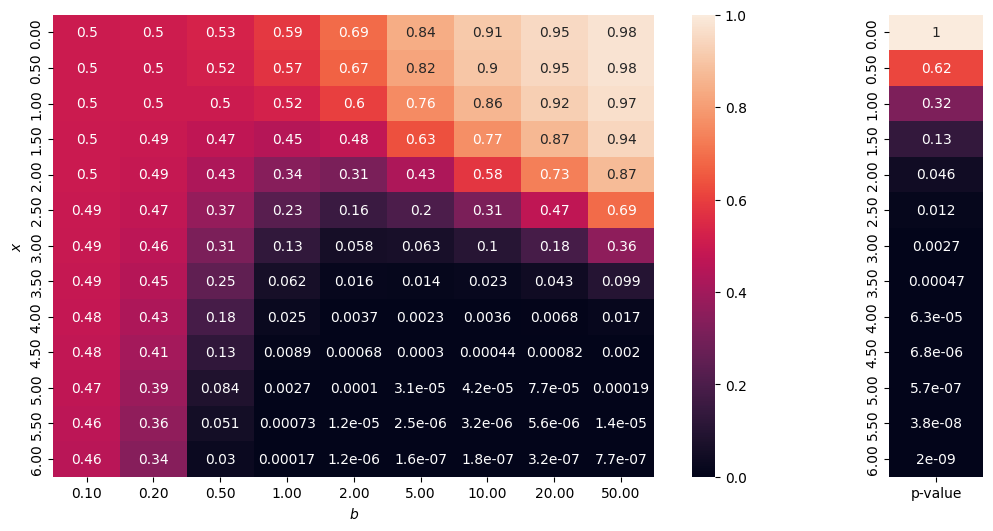

In [180]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [8, 1]})
sns.heatmap(df, vmin=0, vmax=1, annot=True, xticklabels=[f'{v:.2f}' for v in b], yticklabels=[f'{v:.2f}' for v in x.flatten()], ax=axs[0]);
axs[0].set_xlabel('$b$');
axs[0].set_ylabel('$x$');
sns.heatmap(df2, vmin=0, vmax=1, annot=True, xticklabels=['p-value'], yticklabels=[f'{v:.2f}' for v in x.flatten()], ax=axs[1], cbar=False);